# Deep Learning pour l'évaluation de la classification des images

Bienvenue dans votre évaluation ! Suivez les instructions en gras ci-dessous pour compléter l'évaluation.

Si vous êtes bloqué, regardez la vidéo et le Notebook de solutions. (Assurez-vous d'exécuter le Notebook avant de poster une question sur le forum Questions-Réponses, s'il vous plaît, merci !)

------------

## Le défi

**Votre tâche consiste à construire un classificateur d'images avec Keras et les Réseaux de Neurones Convolutifs pour le dataset du Fashion MNIST. Cet ensemble de données comprend 10 labels (ou étiquettes) de différents types de vêtements avec des images 28 par 28 *en niveaux de gris*. Il existe un ensemble d'entraînement de 60 000 images et 10 000 images de test.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

## Les données

**Tâche 1 : Exécutez le code ci-dessous pour télécharger l'ensemble de données en utilisant Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualisation des données

**Tâche 2 : Utilisez matplotlib pour visualiser une image de l'ensemble des données. Il peut s'agir de n'importe quelle image de l'ensemble de données.**

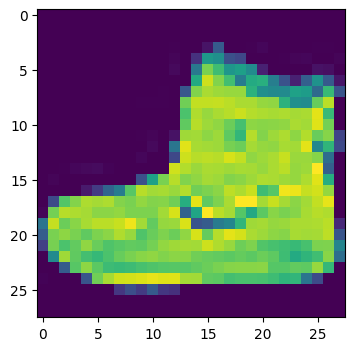

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.imshow(x_train[0]) 
plt.axis('on')                    
plt.show()


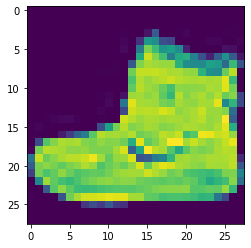

## Pré-traitement des données

**Tâche 3 : Normaliser les données d'entraînement X et les données de test X en les divisant par la valeur maximale des tableaux d'images.**

In [5]:
x_train = x_train / 255.0

In [6]:
x_test = x_test / 255.0

In [7]:
print("Training data:", x_train.shape)
print("Test data :", x_test.shape)
print("Sample pixel value after normalization:", x_train[0, 0, 0])

Training data: (60000, 28, 28)
Test data : (10000, 28, 28)
Sample pixel value after normalization: 0.0


**Tâche 4 : remodeler (reshape) les tableaux X pour inclure une dimension 4 du canal unique. Similaire à ce que nous avons fait pour l'ensemble de données des chiffres MNIST.**

In [9]:
x_train = x_train.reshape(-1, 28, 28, 1) 

In [10]:
x_test = x_test.reshape(-1, 28, 28, 1)

In [11]:
print("Reshaped training data:", x_train.shape) 
print("Reshaped test data:", x_test.shape) 

Reshaped training data: (60000, 28, 28, 1)
Reshaped test data: (10000, 28, 28, 1)


**Tâche 5 : Convertir les valeurs y_train et y_test pour qu'elles soient encodées en one-hot pour une analyse catégorielle par Keras.**

In [13]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [14]:
print("Shape of y_train:", y_train.shape)

Shape of y_train: (60000, 10, 10)


In [15]:
print("Shape of y_test:", y_test.shape)

Shape of y_test: (10000, 10, 10)


In [16]:
print("Sample one-hot encoded label:", y_train[0])

Sample one-hot encoded label: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Construction du Modèle

**Tâche 5 : Utilisez Keras pour créer un modèle composé d'au moins les couches suivantes (mais n'hésitez pas à expérimenter):**

* Couche convolutionnelle 2D, filtres=32 et kernel_size=(4,4)
* Couche de Pooling où pool_size = (2,2)

* Aplatir la couche
* Couche Flatten (128 neurones, mais n'hésitez pas à jouer avec cette valeur), activation RELU

* Couche finale Dense de 10 neurones avec une activation softmax

**Compilez ensuite le modèle avec ces paramètres : loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

C:\Users\hajbo\anaconda3\envs\AI2024\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Entraînement du Modèle

**Tâche 6 : Train/Fit le modèle pour le set x_train. Le nombre d'ipochs dépend de vous**.

In [22]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(32, 10, 10), output.shape=(32, 10)

### Évaluation du Modèle

**Tâche 7 : Montrez l'exactitude (accuracy), la précision, le rappel (recall), et le Score-F1 du modèle obtenu sur l'ensemble de données x_test. Gardez à l'esprit qu'il y a plusieurs façons de le faire, mais nous vous recommandons de suivre la même procédure que celle que nous avons montrée dans la vidéo sur le MNIST**.

In [23]:
model.metrics_names

['loss', 'compile_metrics']

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

In [25]:
predictions = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [28]:
losses = np.DataFrame(model.history.history)

AttributeError: module 'numpy' has no attribute 'DataFrame'

In [27]:
print(classification_report(y_test,predictions))

ValueError: Classification metrics can't handle a mix of unknown and multiclass targets

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.88      0.83      0.85      1000
           3       0.93      0.91      0.92      1000
           4       0.88      0.84      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.70      0.81      0.75      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



**Excellent Travail !**